In [1]:
%load_ext watermark
%watermark -v -m -p numpy,tensorflow

CPython 3.5.2
IPython 5.1.0

numpy 1.12.1
tensorflow 1.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
sess = tf.Session()

상수 텐서로 이루어진 덧셈 식을 만듭니다.

In [4]:
x = tf.constant(1.0)
b = tf.constant(2.0)
y = x + b

x의 계수는 1이므로 편미분의 값도 1이 됩니다.

In [5]:
sess.run(tf.gradients(y, x))

[1.0]

b의 계수도 마찬가지로 1이므로 결과가 동일합니다.

In [6]:
sess.run(tf.gradients(y, b))

[1.0]

x 텐서의 계수를 2로 바꾸어 보겠습니다. 그러면 편미분의 결과가 2로 바뀝니다.

In [7]:
y = 2 * x + b

In [8]:
sess.run(tf.gradients(y, x))

[2.0]

이 식을 사용하여 시그모이드 연산 노드를 만들어 보겠습니다.

In [9]:
s = tf.sigmoid(y)

y에 대한 시그모이드 노드의 편미분 값을 계산해 보겠습니다.

In [10]:
sess.run(tf.gradients(s, y))

[0.017662734]

이 값이 정확한지 확인해 보겠습니다. 시그모이드 s의 미분 공식은 s*(1-s) 입니다. 식 y의 출력은 4이므로 값을 대입해 보겠습니다.

In [11]:
sz = 1/(1+np.exp(-4.0))
sz * (1 - sz)

0.017662706213291107

거의 일치하네요. 그럼 x에 대한 시그모이드 노드의 편미분 값은 어떨까요?

In [12]:
sess.run(tf.gradients(s, x))

[0.035325468]

이 계산이 정확한 것일까요? 미분의 체인룰에 따라 ds/dx=ds/dy * dy/dx 입니다. 우리는 앞에서 ds/dy를 계산했고, dy/dx 도 계산했으므로

In [13]:
0.017662734 * 2.0

0.035325468

정확하게 맞습니다. b에 대한 시그모이드 노드의 편미분 값은 dy/db가 1이므로 값을 예상할 수 있습니다.

In [14]:
sess.run(tf.gradients(s, b))

[0.017662734]

렐루 함수의 미분은 x 값 그대로 입니다.

In [15]:
r = tf.nn.relu(y)
sess.run(tf.gradients(r, x))

[2.0]

음수일 경우에 렐루의 미분은 0 입니다.

In [16]:
r = tf.nn.relu(y - 5)
sess.run(tf.gradients(r, x))

[0.0]

텐서플로 첫걸음 2장에 있는 선형 회귀 예제를 tf.gradients() 함수를 사용하여 풀어 보겠습니다. 먼저 데이터셋을 인위적으로 만듭니다.

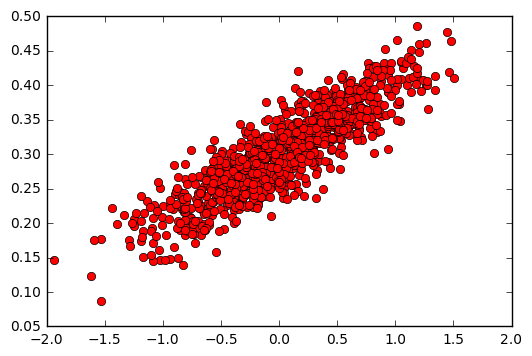

In [17]:
num_points = 1000
x_data = []
y_data = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    x_data.append(x1)
    y_data.append(y1)
plt.plot(x_data, y_data, 'ro')

GradientDescentOptimizer 대신 가중치와 바이어스를 업데이트 하는 연산 노드를 직접 만듭니다.

In [18]:
g1 = tf.Graph()
with g1.as_default():
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
    b = tf.Variable(tf.zeros([1]))
    y = W * x_data + b
    loss = tf.reduce_mean(tf.square(y - y_data))
#     optimizer = tf.train.GradientDescentOptimizer(0.5)
#     train = optimizer.minimize(loss)
    dW, db = tf.gradients(loss, [W, b])
    update_W = tf.assign(W, W - 0.5 * dW)
    update_b = tf.assign(b, b - 0.5 * db)

훈련한다는 것은 가중치를 업데이트하는 것입니다.

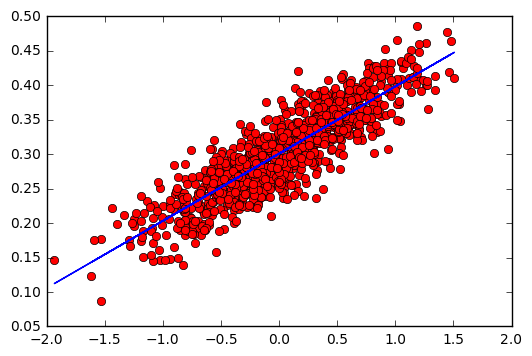

In [19]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20):
        sess.run([update_W, update_b])
    Wp, bp = sess.run([W, b])
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, Wp * x_data + bp)